#**Participant profiling**


In [26]:
#!pip install scikit_posthocs
#!pip install statsmodels
#pip install statsmodels

In [27]:
import warnings
warnings.filterwarnings('ignore')
#Import libraries
import pandas as pd
#scikit_posthocs: Python package which provides post hoc tests for pairwise multiple comparisons https://scikit-posthocs.readthedocs.io/en/latest/
import scikit_posthocs as sp
#pingouin is an open-source statistical package for calculating Reliability and consistency https://pingouin-stats.org/build/html/index.html
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [9]:
#Read file containing SUS scores
sus=pd.read_csv("participant_data.csv", sep=";")

In [10]:
sus.head()

,ID,Category,Gender,Age,Education,1. I think that I would like to use this syste...,2. I found the system unnecessarily complex,3. I thought the system was easy to use,4. I think that I would need the support of a ...,5. I found the various functions in this syste...,...,Buy,Download,File search,Filter,Geometry search,Locate,Map exploration,Point search,Text search,View
0,A2,A. Novice users,Male,More than 35,Graduate or lower,3,3,3,4,4,...,1,2,0,4,1,6,1,0,2,2
1,A3,A. Novice users,Male,More than 35,Graduate or lower,2,4,4,4,3,...,1,2,0,4,0,0,0,0,1,2
2,A6,A. Novice users,Female,More than 35,Graduate or lower,3,3,1,3,3,...,1,2,0,0,0,0,0,0,1,4
3,A7,A. Novice users,Male,More than 35,Graduate or lower,3,2,3,1,4,...,0,2,0,1,0,0,1,0,1,1
4,A8,A. Novice users,Male,35 or less,Postgraduate,2,3,3,2,3,...,0,2,0,2,0,1,0,0,1,2


In [ ]:
sus.SUS.describe()

count    21.000000
mean     65.714286
std      14.623245
min      30.000000
25%      55.000000
50%      70.000000
75%      75.000000
max      87.500000
Name: SUS, dtype: float64

In [11]:
sus.iloc[:,7:17]

,3. I thought the system was easy to use,4. I think that I would need the support of a ...,5. I found the various functions in this syste...,6. I thought there was too much inconsistency ...,7. I would imagine that most people would lear...,8. I found the system very cumbersome to use,9. I felt very confident using the system,10. I needed to learn a lot of things before I...,11. The answers given by the search engine to their queries were useful and relevant,SUS
0,3,4,4,2,4,4,3,4,5,85.0
1,4,4,3,3,2,3,3,3,4,77.5
2,1,3,3,3,3,3,3,1,5,65.0
3,3,1,4,0,4,2,3,1,5,57.5
4,3,2,3,3,4,3,2,3,3,70.0
5,1,3,2,2,3,3,3,3,2,65.0
6,3,1,3,4,3,4,3,3,5,75.0
7,4,2,3,2,1,3,3,1,4,55.0
8,3,4,3,1,3,4,3,4,2,75.0
9,3,4,3,3,2,4,3,4,5,80.0


In [12]:
# Function to calculate Cronbach's Alpha value (coefficient measuring the reliability of a set of survey items)
pg.cronbach_alpha(data=sus.iloc[:,7:17])

(0.4755581619826942, array([0.063, 0.754]))

In [13]:
#Median System Usability Scale (SUS) scores for each item and testing group
sus.groupby(['Category']).mean().T

<ipython-input-13-f6e91d541fe1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sus.groupby(['Category']).mean().T


Category,A. Novice users,B. Expert unfamiliar users,C. Expert familiar users
1. I think that I would like to use this syste...,2.714286,3.000000,2.571429
2. I found the system unnecessarily complex,3.000000,2.428571,1.428571
3. I thought the system was easy to use,2.571429,3.000000,2.857143
4. I think that I would need the support of a ...,2.571429,3.428571,3.000000
5. I found the various functions in this syste...,3.142857,2.714286,1.857143
6. I thought there was too much inconsistency ...,2.428571,2.571429,1.857143
7. I would imagine that most people would lear...,3.285714,2.428571,1.000000
8. I found the system very cumbersome to use,3.142857,3.571429,2.000000
9. I felt very confident using the system,2.857143,2.428571,2.428571
10. I needed to learn a lot of things before I...,2.571429,3.285714,2.714286


In [ ]:
#sus.groupby(['Category']).mean().T.to_excel("mean.xlsx")

<ipython-input-10-539760d308bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sus.groupby(['Category']).mean().T.to_excel("mean.xlsx")


In [14]:
sus.Category.unique()

array(['A. Novice users', 'B. Expert unfamiliar users',
       'C. Expert familiar users'], dtype=object)

In [15]:
# Function to calculate Kruskal-Wallis (non-parametric test to check whether a data set comes from the same population)
def kruskal_wallis(item):
  kruskal_result=stats.kruskal(sus[sus["Category"]=="A. Novice users"][item], sus[sus["Category"]=="B. Expert unfamiliar users"][item], sus[sus["Category"]=="C. Expert familiar users"][item])
  return kruskal_result

In [28]:
# Run the Kruskal-Wallis test for each item split by test group
mydataframe = pd.DataFrame()
for item in sus.columns[1:]:
    #kruskal_wallis(item)
    new_row = {'item':item, 'statistic':kruskal_wallis(item)[0], 'pvalue':kruskal_wallis(item)[1]}
    mydataframe = mydataframe.append(new_row, ignore_index=True)
mydataframe
# We can observe that only items 7 and 8 are different at α = .05

,item,statistic,pvalue
0,Category,20.000000,0.000045
1,Gender,0.363636,0.833753
2,Age,0.000000,1.000000
3,Education,6.500000,0.038774
4,A,0.629540,0.729957
5,B,7.989868,0.018409
6,C,0.749452,0.687478
7,D,2.171936,0.337575
8,E,7.450980,0.024101
9,F,2.093212,0.351127


In [18]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


In [19]:
from statsmodels.formula.api import ols

In [20]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]


In [22]:
sus.columns

Index(['ID', 'Category', 'Gender', 'Age', 'Education',
       '1. I think that I would like to use this syste...',
       '2. I found the system unnecessarily complex',
       '3. I thought the system was easy to use',
       '4. I think that I would need the support of a ...',
       '5. I found the various functions in this syste...',
       '6. I thought there was too much inconsistency ...',
       '7. I would imagine that most people would lear...',
       '8. I found the system very cumbersome to use',
       '9. I felt very confident using the system',
       '10. I needed to learn a lot of things before I...',
       '11. The answers given by the search engine to their queries were useful and relevant',
       'SUS', 'Activities', 'Duration', 'Buy', 'Download', 'File search',
       'Filter', 'Geometry search', 'Locate', 'Map exploration',
       'Point search', 'Text search', 'View'],
      dtype='object')

In [23]:
sus.columns =['ID','Category','Gender','Age','Education',"A", "B", "C","D","E","F","G","H","I","J","K",'SUS','Activities','Duration','Buy', 'Download', 'FileSearch','Filter','GeometrySearch','Locate','MapExploration','PointSearch','TextSearch','View']
sus.columns

Index(['ID', 'Category', 'Gender', 'Age', 'Education', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'I', 'J', 'K', 'SUS', 'Activities', 'Duration', 'Buy',
       'Download', 'FileSearch', 'Filter', 'GeometrySearch', 'Locate',
       'MapExploration', 'PointSearch', 'TextSearch', 'View'],
      dtype='object')

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
https://www.dummies.com/article/business-careers-money/business/economics/test-for-heteroskedasticity-with-the-goldfeld-quandt-test-156431/

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_theilsen.html

In [24]:
# Run the Kruskal-Wallis test for each item split by test group
for item in sus.columns[7:31]:
    #kruskal_wallis(item)
    #print(item+' ~ C(Category) + C(Gender) + C(Education)')
    fit = ols((item+' ~ Category + Gender + Education + Age'), data=sus).fit()
    results=fit.summary(alpha=0.05)
    print(item)
    print(results)

    name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
    test = sms.jarque_bera(fit.resid)
    print(lzip(name, test))

    name = ["F statistic", "p-value"]
    test = sms.het_goldfeldquandt(fit.resid, fit.model.exog)
    print(lzip(name, test))




C
                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.047
Date:                Thu, 25 Jan 2024   Prob (F-statistic):              0.427
Time:                        13:14:39   Log-Likelihood:                -24.581
No. Observations:                  21   AIC:                             61.16
Df Residuals:                      15   BIC:                             67.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

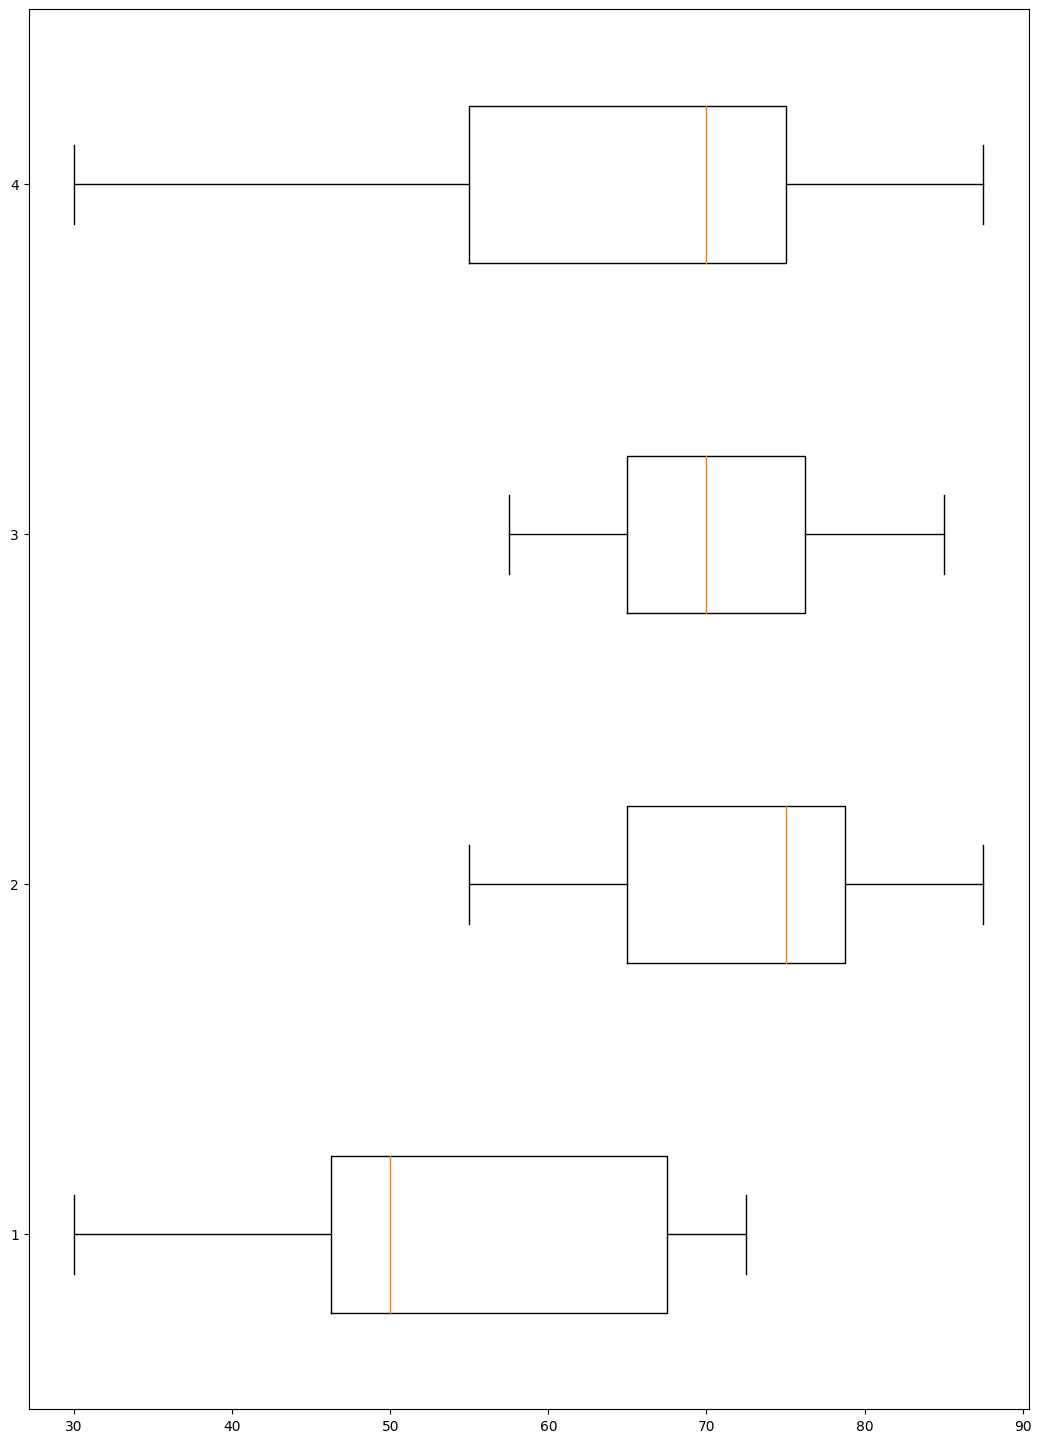

In [25]:
# Box plots of System Usability Scale (SUS) scores for each testing group
# Spliting testing grups
data_1 = sus["SUS"]
data_2 = sus[sus["Category"]=="A. Novice users"]["SUS"]
data_3 = sus[sus["Category"]=="B. Expert unfamiliar users"]["SUS"]
data_4 = sus[sus["Category"]=="C. Expert familiar users"]["SUS"]
data = [data_4, data_3, data_2, data_1]
fig = plt.figure(figsize =(10, 14))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data,vert = 0)
#ax.set_yticklabels(['ALL', 'Expert Familiar Users','Expert Unfamiliar Users', 'Novice Users'])
# show plot
plt.show()